In [25]:
import numpy as np
import matplotlib.pyplot as plt 


In [4]:
def generate_X(n):
    U=np.random.uniform(0,1,size=n)
    return (len(np.unique(np.floor(365*U)))<n)


In [5]:
N=10000
X=np.zeros(N)
for i in range(N):
    X[i]=generate_X(60)
    

In [6]:
mu=X.mean()

In [7]:
sd=X.std()

In [8]:
SE=sd/np.sqrt(N)

In [9]:
lower=mu-1.96*SE
upper=mu+1.96*SE

In [12]:
upper

0.9954261328272467

In [14]:
def hoeffding_bound(m,epsilon):
    #step 0: return the right hand side of (1)
    p_bound = 2*np.exp(-2*m*epsilon**2)
    return p_bound

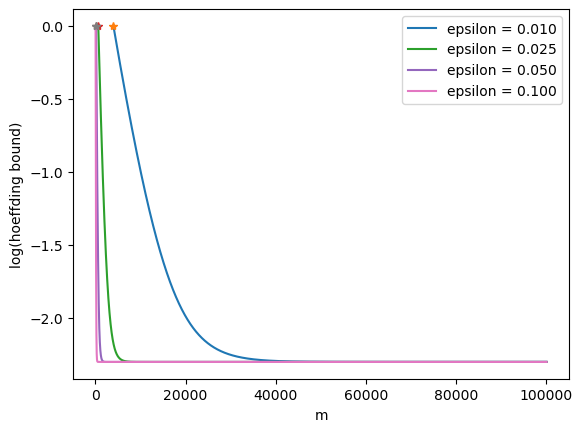

In [27]:
t = np.arange(1,10**5)
eps_range = np.array([.01,.025,.05,.1])
for eps in eps_range:
    hb = hoeffding_bound(t,eps)+0.1
    val_idx = hb<1
    t_filt = t[val_idx]
    hb_filt = hb[val_idx]
    plt.plot(t_filt,np.log(hb_filt),label = f"epsilon = {eps:.3f}")
    plt.plot(t_filt[0],np.log(hb_filt[0]),'*')
plt.xlabel('m')
plt.ylabel('log(hoeffding bound)')
plt.legend() 

In [18]:
val_idx

array([False, False, False, ...,  True,  True,  True])

In [19]:
t_filt

array([   35,    36,    37, ..., 99997, 99998, 99999])

In [20]:
hb_filt

array([0.99317061, 0.97350451, 0.95422783, ..., 0.        , 0.        ,
       0.        ])

In [21]:
abs(4-3)

1

In [23]:
len(hb_filt)

99965

In [31]:
len(abs(hb - 0.5)<0.1)

99999

In [47]:
def gen_data(n):
    #step 1: generate mean 0, stdev 1, guassian data
    data = np.random.normal(0,1,n)
    return data

In [48]:
N = 15000
dat = gen_data(N)

In [55]:
len((abs(dat-0.5)<0.1)==True)

15000

In [62]:
dat.sort()

In [65]:
(abs(dat-0.5) < 1).sum()

5142